**CLASSIFICATION: DECISION TREE**

*Patricia Pepita - 2602174176*

**Load Library & Data**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Credit Score Classification Dataset.csv')

**EDA**

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
df.shape

(164, 8)

In [6]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [8]:
df['Credit Score'].value_counts()

Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64

In [10]:
df['Education'].value_counts()

Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

In [12]:
df['Marital Status'].value_counts()

Marital Status
Married    87
Single     77
Name: count, dtype: int64

In [17]:
df['Home Ownership'].value_counts()

Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

- Convert Categorial Values to Numeric Values

In [14]:
# (gender, education, marital status, home ownership, credit score)

df['Gender'].mask(df['Gender'] == 'Male', 0, inplace=True)
df['Gender'].mask(df['Gender'] == 'Female', 1, inplace=True)

In [15]:
df['Education'].mask(df['Education'] == 'High School Diploma', 0, inplace=True)
df['Education'].mask(df['Education'] == "Associate's Degree", 1, inplace=True)
df['Education'].mask(df['Education'] == "Bachelor's Degree", 2, inplace=True)
df['Education'].mask(df['Education'] == "Master's Degree", 3, inplace=True)
df['Education'].mask(df['Education'] == 'Doctorate', 4, inplace=True)


In [13]:
df['Marital Status'].mask(df['Marital Status'] == 'Single', 0, inplace=True)
df['Marital Status'].mask(df['Marital Status'] == 'Married', 1, inplace=True)

In [18]:
df['Home Ownership'].mask(df['Home Ownership'] == 'Rented', 0, inplace=True)
df['Home Ownership'].mask(df['Home Ownership'] == 'Owned', 1, inplace=True)

In [26]:
df['Credit Score'].mask(df['Credit Score'] == 'Low', 0, inplace=True)
df['Credit Score'].mask(df['Credit Score'] == 'Average', 1, inplace=True)
df['Credit Score'].mask(df['Credit Score'] == 'High', 2, inplace=True)

In [27]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,2,0,0,0,2
1,30,0,100000,3,1,2,1,2
2,35,1,75000,4,1,1,1,2
3,40,0,125000,0,0,0,1,2
4,45,1,100000,2,1,3,1,2


- Convert Data Types (Categorial to Numeric)

In [29]:
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')
df['Marital Status'] = pd.to_numeric(df['Marital Status'], errors='coerce')
df['Home Ownership'] = pd.to_numeric(df['Home Ownership'], errors='coerce')
df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 164 non-null    int64
 1   Gender              164 non-null    int64
 2   Income              164 non-null    int64
 3   Education           164 non-null    int64
 4   Marital Status      164 non-null    int64
 5   Number of Children  164 non-null    int64
 6   Home Ownership      164 non-null    int64
 7   Credit Score        164 non-null    int64
dtypes: int64(8)
memory usage: 10.4 KB


In [31]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,2,0,0,0,2
1,30,0,100000,3,1,2,1,2
2,35,1,75000,4,1,1,1,2
3,40,0,125000,0,0,0,1,2
4,45,1,100000,2,1,3,1,2


**Impute Missing Value & Check Outliers**

In [38]:
import matplotlib.pyplot as plt

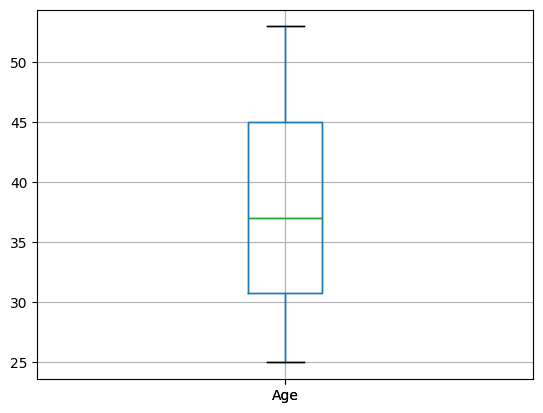

In [41]:
boxplot = df.boxplot(column=['Age']) 
plt.show()

In [44]:
# No need to impute missing value with since there's no missing value in this data set

**Split Data into Train and Test Data**

In [46]:
input_df=df.drop('Credit Score',axis=1)
output_df=df['Credit Score']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)
# 20% test size, 80% training size

In [48]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

DT_class = DecisionTreeClassifier()
DT_class.fit(x_train, y_train)
y_predict=DT_class.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['Low CS','Average CS','High CS']))


Classification Report

              precision    recall  f1-score   support

      Low CS       1.00      1.00      1.00         1
  Average CS       0.83      1.00      0.91         5
     High CS       1.00      0.96      0.98        27

    accuracy                           0.97        33
   macro avg       0.94      0.99      0.96        33
weighted avg       0.97      0.97      0.97        33



**Tuning Parameter using GridSearchCV**

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8], 
}

In [51]:
DT_class2 = DecisionTreeClassifier()
DT_class2= GridSearchCV(DT_class2 ,
                            param_grid = parameters,  
                            scoring='accuracy',        
                            cv=2)  

In [52]:
DT_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("Accuracy :",DT_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 2}
Accuracy : 0.9540792540792541


In [63]:
#Train the data using based parameter, in this case, gini 
DT_class_best = DecisionTreeClassifier(criterion= 'gini',max_depth=8)

In [64]:
DT_class_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [61]:
y_predict_best=DT_class_best.predict(x_test)

In [66]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['Low CS','Average CS','High CS']))


Classification Report

              precision    recall  f1-score   support

      Low CS       1.00      1.00      1.00         1
  Average CS       0.83      1.00      0.91         5
     High CS       1.00      0.96      0.98        27

    accuracy                           0.97        33
   macro avg       0.94      0.99      0.96        33
weighted avg       0.97      0.97      0.97        33



**Model Evaluation**

There is no difference between classification report of decision tree and tuned parameters by gridcv.
The result itself is already good enough, with precision 1 for predicting Low Credit Score and High Credit Score, and 0.83 for predicting
Average Credit Score.
I tried to tune by using entropy as based parameter, but the result is the same.
Highest F1 score is from LOW CS. It means that the proportion between precision and recall is balance

**Conclusion**

Overall, the model has 97% accuracy in predicting the credit score type